<a href="https://colab.research.google.com/github/ahammedshaneebnk/ML_Parameter_Estimation/blob/main/exercise_1_maximum_likelihood_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maximum Likelihood Estimation (MLE) for Normally Distributed Data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# function to plot the pdf
def plot_pdf(x, mu, sigma, lw=1):
  plt.plot(x, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)),
             linewidth=lw)

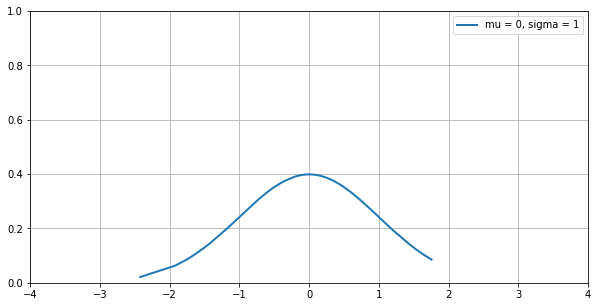

In [ ]:
# normal distribution
# sample data
mu = 0
sigma = 1
sample_size = 50
sample_data = np.random.normal(mu, sigma, sample_size)

# plot sample distribution
plt.figure(1, [10.0, 5.0])
plot_pdf(np.sort(sample_data), mu, sigma, 2)
plt.grid('True')
plt.axis([-4, 4, 0, 1])
plt.legend(['mu = %d, sigma = %d'%(mu, sigma)])

In [ ]:
# log likelihood for range of means and fixed sigma
def get_log_likelihood_mean(test_means, sigma):
  mean_cap = 0
  log_likelihood = np.zeros(len(test_means))
  k = 0
  n = len(sample_data)
  for test_mean in test_means:
    log_likelihood[k] = -(n/2)*np.log(2*np.pi) - n*np.log(sigma) - sum(((sample_data - test_mean)**2)/(2*sigma**2))
    k = k+1
  plt.plot(test_means, log_likelihood)
  mean_cap = test_means[np.argmax(log_likelihood)]
  print(f"maximum log likelihood value = {max(log_likelihood)} when mu = {mean_cap} and sigma = {sigma}")
  plt.axvline(mean_cap, ls='--', c='orange')
  plt.axhline(max(log_likelihood), ls='--', c='orange')
  plt.title('mu = -2 to 2, sigma = %s'%(sigma))
  plt.grid('True')
  plt.annotate('(%.4f, %.4f)'%(mean_cap, max(log_likelihood)), xy =(mean_cap, max(log_likelihood)), 
                xytext =(0, np.min(log_likelihood_value)),  
                arrowprops = dict(facecolor ='green', 
                                  shrink = 0.05),)
  return mean_cap, max(log_likelihood)

maximum log likelihood value = -119.76506459286482 when mu = 0.14141414141414144 and sigma = 0.5
maximum log likelihood value = -73.06580090039074 when mu = 0.14141414141414144 and sigma = 1.0
maximum log likelihood value = -78.27301506126723 when mu = 0.14141414141414144 and sigma = 1.5
maximum log likelihood value = -87.38400424827017 when mu = 0.14141414141414144 and sigma = 2.0
maximum log likelihood value = -96.10048313236653 when mu = 0.14141414141414144 and sigma = 2.5
max log likelihood among checked combinations = -73.06580090039074
corresponding mu = 0.14141414141414144 and sigma = 1.0


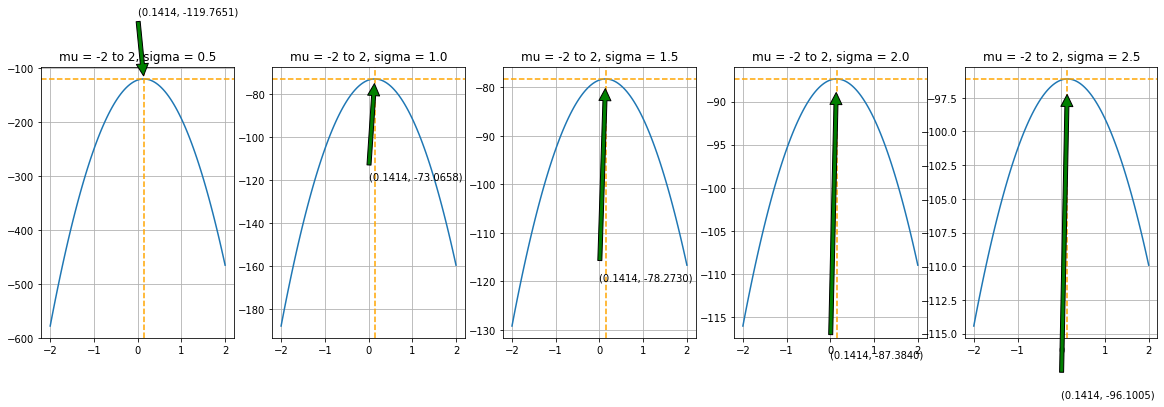

In [ ]:
# get best mean from log likelihood function, sd = 1
test_means = np.linspace(-2,2,100)
test_sigmas  = np.array([0.5, 1.0, 1.5, 2, 2.5])
mean_cap = np.zeros(len(test_sigmas))
log_likelihood_value = np.zeros(len(test_sigmas))
plt.figure(2, [20.0, 5.0])
for i in range(len(test_sigmas)):
  plt.subplot(151 + i)
  mean_cap[i], log_likelihood_value[i] = get_log_likelihood_mean(test_means, test_sigmas[i])
best_est_mean = mean_cap[np.argmax(log_likelihood_value)]
best_est_sigma = test_sigmas[np.argmax(log_likelihood_value)]
print(f"max log likelihood among checked combinations = {max(log_likelihood_value)}")
print(f"corresponding mu = {best_est_mean} and sigma = {best_est_sigma}")

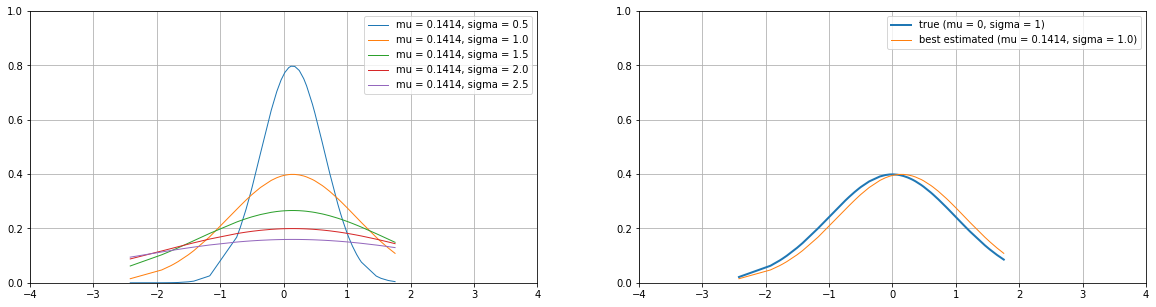

In [ ]:
# plot distributions with the checked combinations
plt.figure(3, [20.0, 5.0])
plt.subplot(121)
for i in range(len(test_sigmas)):
  plot_pdf(np.sort(sample_data), mean_cap[i], test_sigmas[i])
plt.grid('True')
plt.axis([-4, 4, 0, 1])
plt.legend(['mu = %.4f, sigma = %.1f'%(mean_cap[0], test_sigmas[0]), 'mu = %.4f, sigma = %.1f'%(mean_cap[1], test_sigmas[1]),
            'mu = %.4f, sigma = %.1f'%(mean_cap[2], test_sigmas[2]), 'mu = %.4f, sigma = %.1f'%(mean_cap[3], test_sigmas[3]),
            'mu = %.4f, sigma = %.1f'%(mean_cap[4], test_sigmas[4])])

# compare the best distribution
plt.subplot(122)
plot_pdf(np.sort(sample_data), mu, sigma, 2)
plot_pdf(np.sort(sample_data), best_est_mean, best_est_sigma)
plt.axis([-4, 4, 0, 1])
plt.grid('True')
plt.legend(['true (mu = %d, sigma = %d)'%(mu, sigma), 'best estimated (mu = %.4f, sigma = %.1f)'%(best_est_mean, best_est_sigma)])

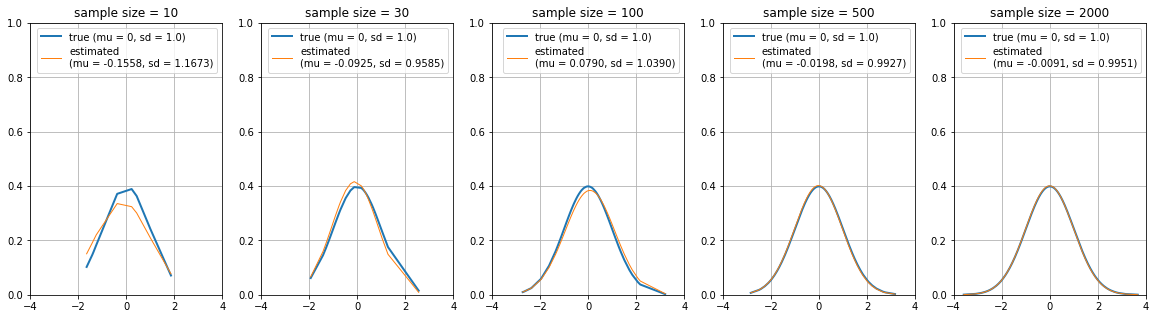

In [ ]:
# estimation with derivatives or formula and comparison with different sample size
def estimate_mu_sigma(n_sample):
  sample = np.random.normal(mu, sigma, n_sample)
  est_mu = sum(sample) / n_sample
  est_sigma = np.sqrt(sum((sample - est_mu) ** 2) / n_sample)
  plot_pdf(np.sort(sample), mu, sigma, 2)
  plot_pdf(np.sort(sample), est_mu, est_sigma)
  plt.axis([-4, 4, 0, 1])
  return est_mu, est_sigma

plt.figure(4, [20.0, 5.0])
plt.grid('True')
test_sample_sizes = np.array([10, 30, 100, 500, 2000])
for i in range(len(test_sample_sizes)):
  plt.subplot(151+i)
  est_mu, est_sigma = estimate_mu_sigma(test_sample_sizes[i])
  plt.legend(['true (mu = %d, sd = %.1f)'%(mu, sigma), 'estimated\n(mu = %.4f, sd = %.4f)'%(est_mu, est_sigma)])
  plt.grid('True')
  plt.title('sample size = %d'%(test_sample_sizes[i]))

plt.show()